Sub-Topics

1. Various Decision Tree Algorithms
2. Understanding generating decision tree using Information Gain
3. Implementation of Decision Tree Algorithm

`How decision tree split records?.
ans: Decision Tree split features or records with help of entropy and giny index?.`

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv(r"D:\Data Science\MACHINE LEARNING\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.shape

(1470, 35)

In [6]:
pd.set_option('display.max_columns', 500)

In [7]:
df['StandardHours'].unique()

array([80], dtype=int64)

<AxesSubplot:>

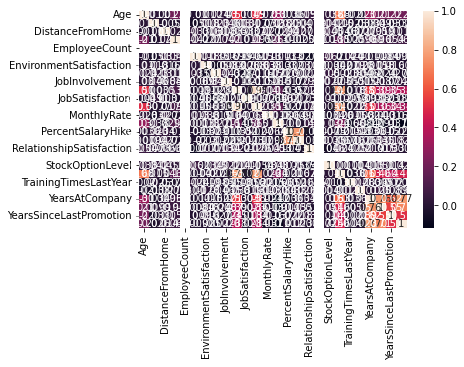

In [9]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

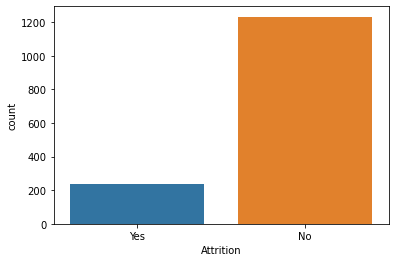

In [10]:
sns.countplot(x = 'Attrition',data = df)

In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [20]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [21]:
c = []
for i in df.columns:
  if df[i].dtype == object:
    c.append(i)

In [22]:
c

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [23]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for i in c:
  df[i] = l.fit_transform(df[i])

In [24]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [25]:
from sklearn.model_selection import train_test_split
X = df.drop('Attrition', axis = 1)
y = df.Attrition

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def score(dt, X_train, y_train, X_test, y_test, train = True):
  if train:
    pred = dt.predict(X_train)
    report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
    print('Accuracy', accuracy_score(y_train, pred)*100)
    print('Classifciaiton Report', report)
    print('COnfusitonmatrix', confusion_matrix(y_train, pred))
  else:
    pred = dt.predict(X_test)
    report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
    print('Accuracy', accuracy_score(y_test, pred)*100)
    print('Classifciaiton Report', report)
    print('COnfusitonmatrix', confusion_matrix(y_test, pred))

In [29]:
score(dt, X_train, y_train, X_test, y_test, train = True)

Accuracy 100.0
Classifciaiton Report                0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    923.0  179.0       1.0     1102.0        1102.0
COnfusitonmatrix [[923   0]
 [  0 179]]


In [30]:
score(dt, X_train, y_train, X_test, y_test, train = False)

Accuracy 81.25
Classifciaiton Report                     0          1  accuracy   macro avg  weighted avg
precision    0.884984   0.400000    0.8125    0.642492      0.808546
recall       0.893548   0.379310    0.8125    0.636429      0.812500
f1-score     0.889246   0.389381    0.8125    0.639313      0.810463
support    310.000000  58.000000    0.8125  368.000000    368.000000
COnfusitonmatrix [[277  33]
 [ 36  22]]


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
params = {
    'criterion': ('gini', 'entropy'),
    'max_depth': (list(range(1,20))),
    'min_samples_split': [2,3,4]
}

cv1 = GridSearchCV(dt, params, scoring = 'accuracy', n_jobs = 1,cv = 4)
cv1.fit(X_train, y_train)
best = cv1.best_params_
print('best Parametrs', best)

best Parametrs {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 2}


In [33]:
dt_new = DecisionTreeClassifier(**best)
dt_new.fit(X_train, y_train)
score(dt_new, X_train, y_train, X_test, y_test, train = True)
score(dt_new, X_train, y_train, X_test, y_test, train = False)

Accuracy 83.7568058076225
Classifciaiton Report                     0      1  accuracy    macro avg  weighted avg
precision    0.837568    0.0  0.837568     0.418784      0.701520
recall       1.000000    0.0  0.837568     0.500000      0.837568
f1-score     0.911605    0.0  0.837568     0.455802      0.763531
support    923.000000  179.0  0.837568  1102.000000   1102.000000
COnfusitonmatrix [[923   0]
 [179   0]]
Accuracy 84.23913043478261
Classifciaiton Report                     0     1  accuracy   macro avg  weighted avg
precision    0.842391   0.0  0.842391    0.421196      0.709623
recall       1.000000   0.0  0.842391    0.500000      0.842391
f1-score     0.914454   0.0  0.842391    0.457227      0.770328
support    310.000000  58.0  0.842391  368.000000    368.000000
COnfusitonmatrix [[310   0]
 [ 58   0]]


D:\Data Science\edyodha packages\conda.2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Data Science\edyodha packages\conda.2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Data Science\edyodha packages\conda.2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

[Text(0.5, 0.75, 'X[15] <= 3492.5\nentropy = 0.64\nsamples = 1102\nvalue = [923, 179]'),
 Text(0.25, 0.25, 'entropy = 0.859\nsamples = 361\nvalue = [259, 102]'),
 Text(0.75, 0.25, 'entropy = 0.481\nsamples = 741\nvalue = [664, 77]')]

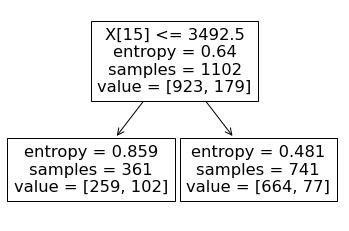

In [37]:
from sklearn import tree

tree.plot_tree(dt_new.fit(X_train, y_train)) 

[Text(0.31957773512476007, 0.9722222222222222, 'X[23] <= 1.5\ngini = 0.272\nsamples = 1102\nvalue = [923, 179]'),
 Text(0.09596928982725528, 0.9166666666666666, 'X[14] <= 1.5\ngini = 0.5\nsamples = 73\nvalue = [37, 36]'),
 Text(0.05758157389635317, 0.8611111111111112, 'X[4] <= 11.0\ngini = 0.424\nsamples = 36\nvalue = [25, 11]'),
 Text(0.030710172744721688, 0.8055555555555556, 'X[0] <= 23.5\ngini = 0.26\nsamples = 26\nvalue = [22, 4]'),
 Text(0.015355086372360844, 0.75, 'X[29] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.007677543186180422, 0.6944444444444444, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.023032629558541268, 0.6944444444444444, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.046065259117082535, 0.75, 'X[7] <= 1.5\ngini = 0.159\nsamples = 23\nvalue = [21, 2]'),
 Text(0.03838771593090211, 0.6944444444444444, 'X[24] <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.030710172744721688, 0.6388888888888888, 'gini = 0.0\nsamples = 2\nvalue

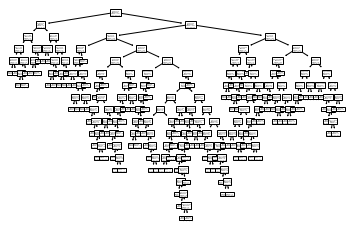

In [35]:
from sklearn import tree

tree.plot_tree(dt.fit(X_train, y_train)) 

In [ ]:
# Decision Tree always use random forest classifier to convert high variance to low variance(to reduce overfitting)